In [20]:
import pandas as pd

# Define the correct file path
file_path = r"C:\Users\asraf\Downloads\Project MAA\Data set 2022-2023.xlsx"

# Load the dataset from Excel
df = pd.read_excel(file_path)

# Display the first few rows
print("Dataset Loaded Successfully:")
print(df.head())  # This will print the first five rows

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

Dataset Loaded Successfully:
   PricePerSq  Zip code  Year  Month  Year Built  Age Sold Last sold price  \
0         224     32207  2022      1        1941        81          295000   
1         265     32207  2022      1        1948        74          429000   
2         152     32207  2022      1        1956        66          190000   
3         299     32207  2022      1        1953        69          575000   
4         220     32207  2022      2        1947        75          230000   

   Size(sqft)  Lot size(sqrt)  Floors  ...  Majority race  Majority Gender  \
0        1317          7353.0       1  ...              3                1   
1        1618          8575.0       1  ...              3                1   
2        1252         19528.0       1  ...              3                1   
3        1926         13533.0       1  ...              3                1   
4        1047          6544.0       1  ...              3                1   

   Med Income  % CollegeUp  Med A

In [22]:
print("Column names in the dataset:")
print(df.columns.tolist())

Column names in the dataset:
['PricePerSq', 'Zip code', 'Year', 'Month', 'Year Built', 'Age Sold', 'Last sold price', 'Size(sqft)', 'Lot size(sqrt)', 'Floors', 'Bed Rooms', 'Bath', 'Pool', 'Garage', 'HOA', 'Prop tax', 'Elementary', 'Middle School', 'Highschool', 'Quiet', 'Majority race', 'Majority Gender', 'Med Income', '% CollegeUp', 'Med Age', 'Commute Time', 'Year to election', 'Party in House', 'Party In Senate', 'Crime Rate/1000 resident ']


In [25]:
from sklearn.preprocessing import StandardScaler

# Corrected numerical column names
num_cols = [
    'Size(sqft)', 'Lot size(sqrt)', 'Floors', 'Bed Rooms', 'Bath', 'Garage', 'HOA',
    'Prop tax', 'Crime Rate/1000 resident ', 'Med Income', '% CollegeUp',
    'Med Age', 'Commute Time', 'Year to election'
]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization
df[num_cols] = scaler.fit_transform(df[num_cols])

# Display the first few rows after scaling
print("Feature Scaling Applied:")
print(df.head())  # Print first few rows to confirm

Feature Scaling Applied:
   PricePerSq  Zip code  Year  Month  Year Built  Age Sold Last sold price  \
0         224     32207  2022      1        1941        81          295000   
1         265     32207  2022      1        1948        74          429000   
2         152     32207  2022      1        1956        66          190000   
3         299     32207  2022      1        1953        69          575000   
4         220     32207  2022      2        1947        75          230000   

   Size(sqft)  Lot size(sqrt)    Floors  ...  Majority race  Majority Gender  \
0   -0.572002       -0.356073 -0.375079  ...              3                1   
1   -0.181006       -0.231554 -0.375079  ...              3                1   
2   -0.656437        0.884526 -0.375079  ...              3                1   
3    0.219084        0.273652 -0.375079  ...              3                1   
4   -0.922730       -0.438507 -0.375079  ...              3                1   

   Med Income  % CollegeU

In [27]:
# Check column data types
print("Column Data Types:")
print(df.dtypes)

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("\nNon-Numeric Columns:", non_numeric_cols)

Column Data Types:
PricePerSq                     int64
Zip code                       int64
Year                           int64
Month                          int64
Year Built                     int64
Age Sold                       int64
Last sold price               object
Size(sqft)                   float64
Lot size(sqrt)               float64
Floors                       float64
Bed Rooms                    float64
Bath                         float64
Pool                           int64
Garage                       float64
HOA                          float64
Prop tax                     float64
Elementary                   float64
Middle School                  int64
Highschool                   float64
Quiet                          int64
Majority race                  int64
Majority Gender                int64
Med Income                   float64
% CollegeUp                  float64
Med Age                      float64
Commute Time                 float64
Year to election   

In [29]:
# Properly remove $ and , symbols and convert to numeric
df['Last sold price'] = df['Last sold price'].replace({r'\$': '', r',': '', r'\xa0': ''}, regex=True)
df['Last sold price'] = pd.to_numeric(df['Last sold price'], errors='coerce')  # Convert to float

# Verify that the column is now numeric
print("Updated Data Types:")
print(df.dtypes)

Updated Data Types:
PricePerSq                     int64
Zip code                       int64
Year                           int64
Month                          int64
Year Built                     int64
Age Sold                       int64
Last sold price                int64
Size(sqft)                   float64
Lot size(sqrt)               float64
Floors                       float64
Bed Rooms                    float64
Bath                         float64
Pool                           int64
Garage                       float64
HOA                          float64
Prop tax                     float64
Elementary                   float64
Middle School                  int64
Highschool                   float64
Quiet                          int64
Majority race                  int64
Majority Gender                int64
Med Income                   float64
% CollegeUp                  float64
Med Age                      float64
Commute Time                 float64
Year to election  

Highly Correlated Feature Pairs (Threshold > 0.8):
('Year', 'Year to election')
('Year', 'Party in House')
('Year', 'Party In Senate')
('Year Built', 'Age Sold')
('Last sold price', 'Size(sqft)')
('Last sold price', 'Prop tax')
('Majority race', 'Med Income')
('Majority race', 'Crime Rate/1000 resident ')
('Med Income', 'Crime Rate/1000 resident ')
('% CollegeUp', 'Party In Senate')
('Year to election', 'Party in House')
('Year to election', 'Party In Senate')
('Party in House', 'Party In Senate')


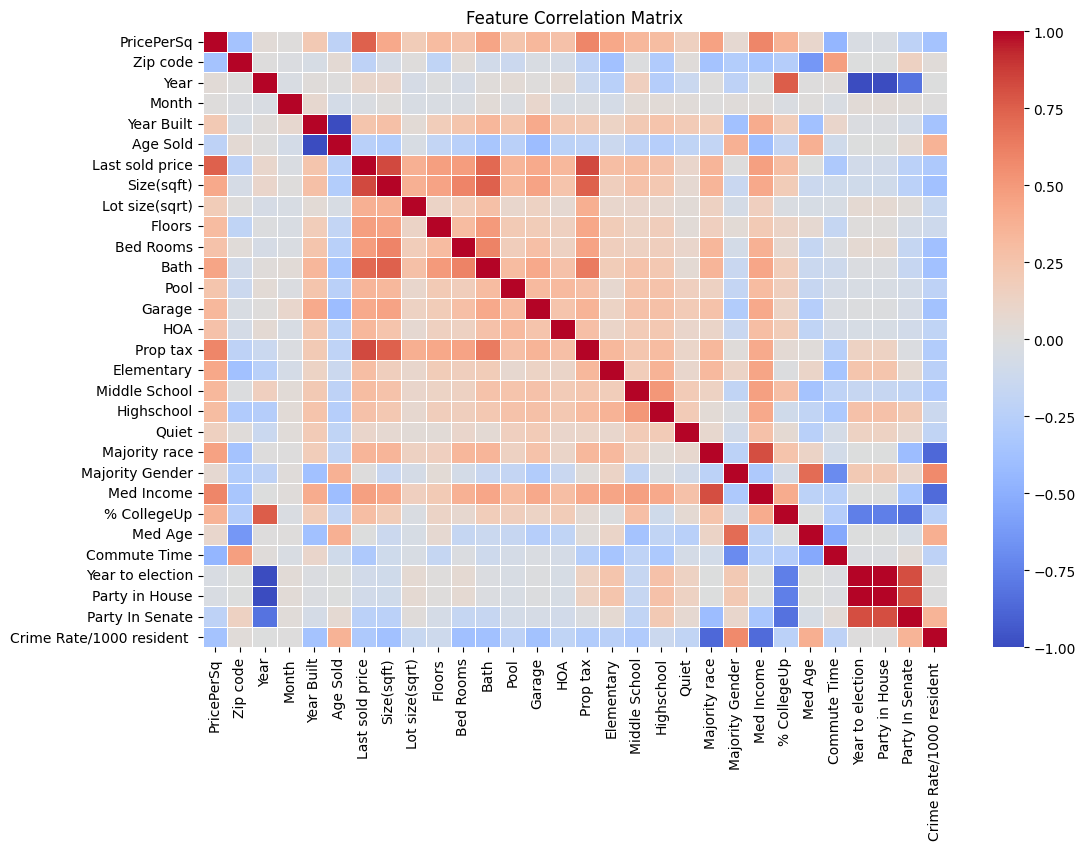

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Set threshold for high correlation
threshold = 0.8

# Find highly correlated features (absolute correlation > threshold)
high_corr_pairs = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) 
                   for i, j in zip(*high_corr_pairs) if i != j and i < j]

# Print highly correlated feature pairs
print("Highly Correlated Feature Pairs (Threshold > 0.8):")
for pair in high_corr_pairs:
    print(pair)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

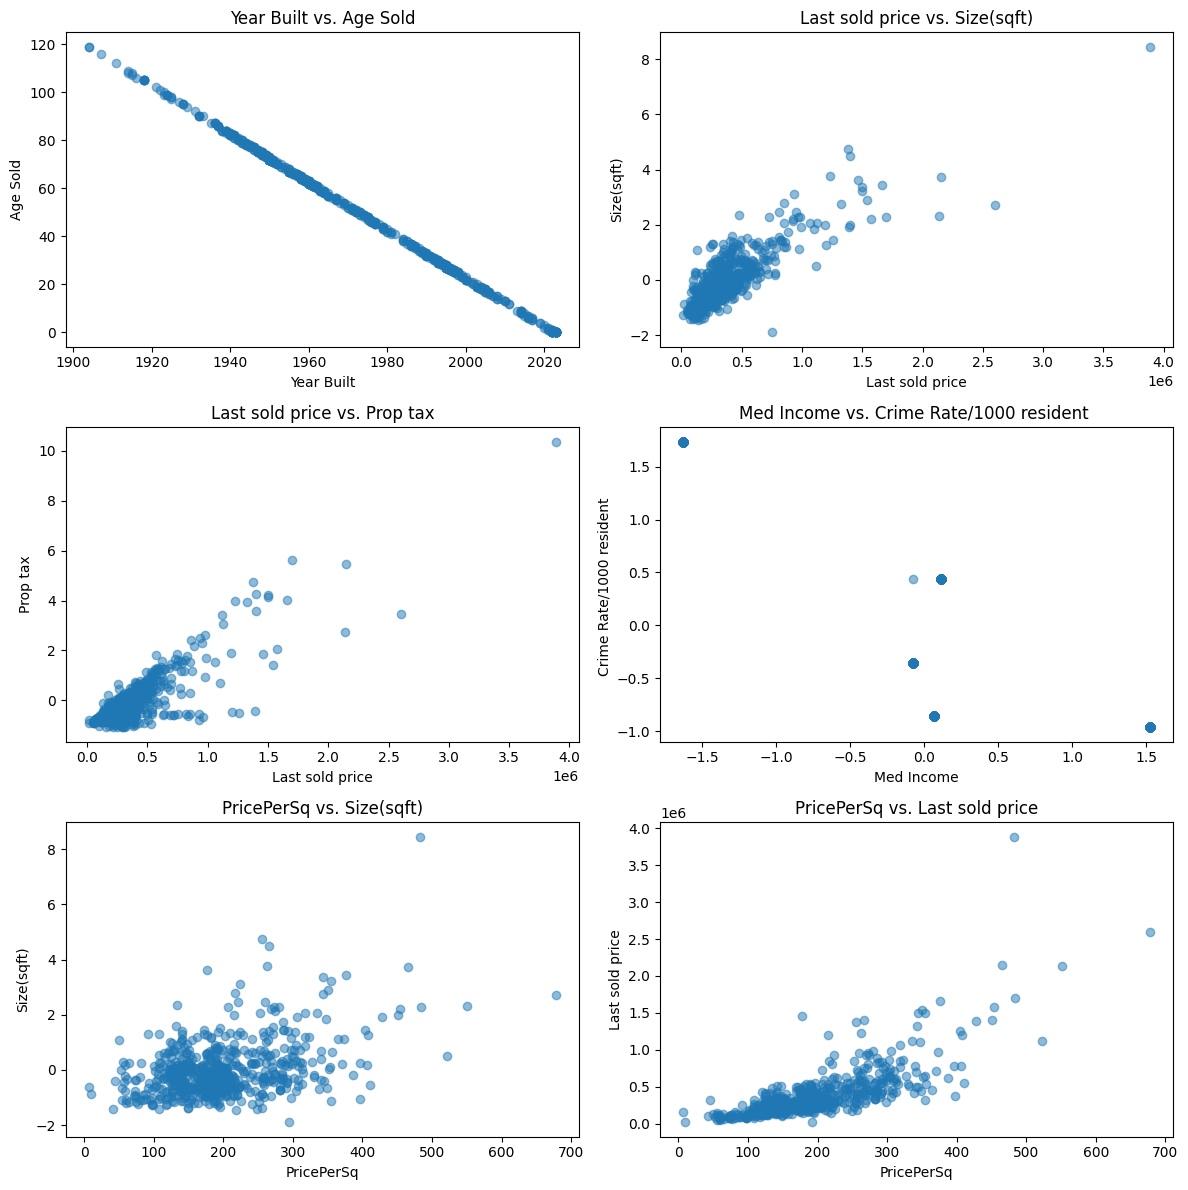

In [32]:
import matplotlib.pyplot as plt

# Define feature pairs for scatter plots
scatter_pairs = [
    ('Year Built', 'Age Sold'),
    ('Last sold price', 'Size(sqft)'),
    ('Last sold price', 'Prop tax'),
    ('Med Income', 'Crime Rate/1000 resident '),
    ('PricePerSq', 'Size(sqft)'),  # Added target variable for extra insight
    ('PricePerSq', 'Last sold price')
]

# Generate scatter plots
plt.figure(figsize=(12, 12))

for i, (x, y) in enumerate(scatter_pairs, 1):
    plt.subplot(3, 2, i)
    plt.scatter(df[x], df[y], alpha=0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs. {y}")

plt.tight_layout()
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

# Define the target variable (PricePerSq)
target = 'PricePerSq'

# Define feature set (excluding target variable)
X = df.drop(columns=[target])
y = df[target]

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 480 samples
Testing set: 120 samples


In [34]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, ElasticNet
import numpy as np

# Define 10-Fold Cross-Validation
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize Ridge and Elastic Net models
ridge = Ridge()
elastic_net = ElasticNet()

# Evaluate Ridge using 10-Fold CV (Outer Loop)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=outer_cv, scoring='neg_mean_squared_error')
ridge_rmse = np.sqrt(-ridge_scores.mean())

# Evaluate Elastic Net using 10-Fold CV (Outer Loop)
elastic_scores = cross_val_score(elastic_net, X_train, y_train, cv=outer_cv, scoring='neg_mean_squared_error')
elastic_rmse = np.sqrt(-elastic_scores.mean())

# Display results
print(f"Initial Ridge Regression RMSE (Outer CV): {ridge_rmse:.4f}")
print(f"Initial Elastic Net RMSE (Outer CV): {elastic_rmse:.4f}")

Initial Ridge Regression RMSE (Outer CV): 41.6617
Initial Elastic Net RMSE (Outer CV): 44.4621


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Ridge, ElasticNet

# Define parameter grid for Ridge
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Define parameter grid for Elastic Net with extended alpha range
elastic_param_grid = {
    'alpha': [0.1, 1, 10, 100, 500, 1000],  # Increased alpha range for stability
    'l1_ratio': [0.1, 0.5, 0.9]
}

# 5-Fold CV for Inner Loop
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Feature selection: Remove low-variance features
selector = VarianceThreshold(threshold=0.01)
X_train_selected = selector.fit_transform(X_train)
X_test_selected = selector.transform(X_test)

# Perform Grid Search for Ridge
ridge_grid = GridSearchCV(Ridge(), ridge_param_grid, cv=inner_cv, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Perform Grid Search for Elastic Net with increased max_iter and tol
elastic_grid = GridSearchCV(
    ElasticNet(max_iter=10000, tol=0.001),  # Increased tolerance for better convergence
    elastic_param_grid,
    cv=inner_cv,
    scoring='neg_mean_squared_error'
)

elastic_grid.fit(X_train_selected, y_train)

# Best hyperparameters and corresponding scores
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_ridge_rmse = np.sqrt(-ridge_grid.best_score_)

best_elastic_alpha = elastic_grid.best_params_['alpha']
best_elastic_l1_ratio = elastic_grid.best_params_['l1_ratio']
best_elastic_rmse = np.sqrt(-elastic_grid.best_score_)

# Display results
print(f"Best Ridge Alpha: {best_ridge_alpha}, RMSE: {best_ridge_rmse:.4f}")
print(f"Final Best Elastic Net Alpha: {best_elastic_alpha}, L1 Ratio: {best_elastic_l1_ratio}, RMSE: {best_elastic_rmse:.4f}")

C:\Users\asraf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.518e+05, tolerance: 2.708e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\asraf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.226e+05, tolerance: 2.538e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\asraf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Best Ridge Alpha: 10, RMSE: 42.3615
Final Best Elastic Net Alpha: 0.1, L1 Ratio: 0.5, RMSE: 42.3501


In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# Train Ridge Model using best alpha
ridge_final = Ridge(alpha=best_ridge_alpha)
ridge_final.fit(X_train, y_train)

# Train Elastic Net Model using best alpha and l1_ratio
elastic_final = ElasticNet(alpha=best_elastic_alpha, l1_ratio=best_elastic_l1_ratio, max_iter=10000, tol=0.001)
elastic_final.fit(X_train, y_train)

# Predict on Test Data
ridge_pred = ridge_final.predict(X_test)
elastic_pred = elastic_final.predict(X_test)

# Evaluate Performance
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_pred)

elastic_mse = mean_squared_error(y_test, elastic_pred)
elastic_rmse = np.sqrt(elastic_mse)
elastic_r2 = r2_score(y_test, elastic_pred)

# Display Results
print(f"Final Ridge Regression Performance on Test Data:")
print(f" - MSE: {ridge_mse:.4f}")
print(f" - RMSE: {ridge_rmse:.4f}")
print(f" - R² Score: {ridge_r2:.4f}")

print("\nFinal Elastic Net Performance on Test Data:")
print(f" - MSE: {elastic_mse:.4f}")
print(f" - RMSE: {elastic_rmse:.4f}")
print(f" - R² Score: {elastic_r2:.4f}")

Final Ridge Regression Performance on Test Data:
 - MSE: 1068.5391
 - RMSE: 32.6885
 - R² Score: 0.7794

Final Elastic Net Performance on Test Data:
 - MSE: 1055.7035
 - RMSE: 32.4916
 - R² Score: 0.7820


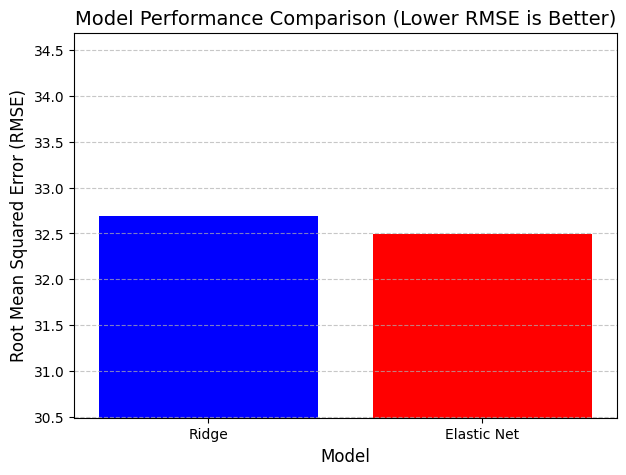

In [45]:
import matplotlib.pyplot as plt

# Bar chart comparing RMSE of Ridge vs. Elastic Net
plt.figure(figsize=(7,5))
plt.bar(["Ridge", "Elastic Net"], [ridge_rmse, elastic_rmse], color=['blue', 'red'])
plt.ylabel("Root Mean Squared Error (RMSE)", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.title("Model Performance Comparison (Lower RMSE is Better)", fontsize=14)
plt.ylim(min(ridge_rmse, elastic_rmse) - 2, max(ridge_rmse, elastic_rmse) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

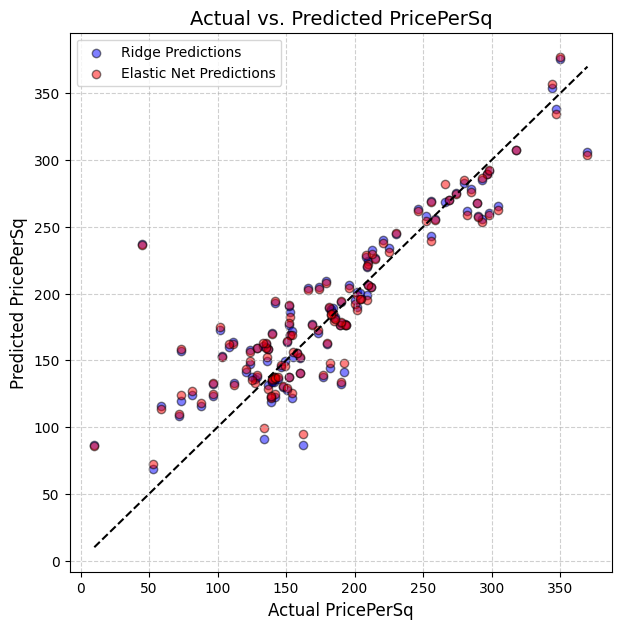

In [46]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, ridge_pred, alpha=0.5, label="Ridge Predictions", color='blue', edgecolors='k')
plt.scatter(y_test, elastic_pred, alpha=0.5, label="Elastic Net Predictions", color='red', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black')  # Perfect Prediction Line
plt.xlabel("Actual PricePerSq", fontsize=12)
plt.ylabel("Predicted PricePerSq", fontsize=12)
plt.legend()
plt.title("Actual vs. Predicted PricePerSq", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

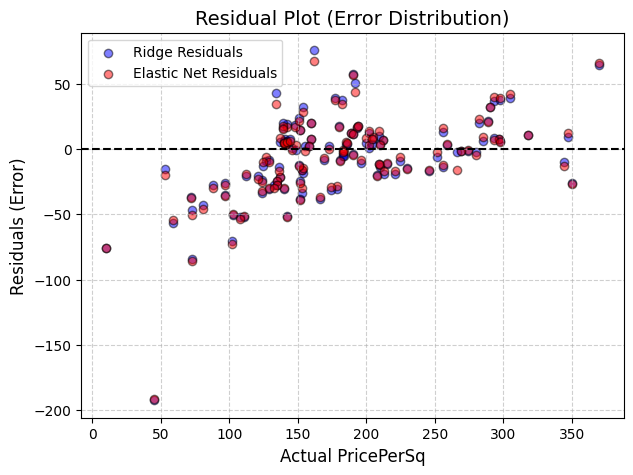

In [47]:
ridge_residuals = y_test - ridge_pred
elastic_residuals = y_test - elastic_pred

plt.figure(figsize=(7,5))
plt.scatter(y_test, ridge_residuals, alpha=0.5, label="Ridge Residuals", color='blue', edgecolors='k')
plt.scatter(y_test, elastic_residuals, alpha=0.5, label="Elastic Net Residuals", color='red', edgecolors='k')
plt.axhline(0, color='black', linestyle='--', linewidth=1.5)
plt.xlabel("Actual PricePerSq", fontsize=12)
plt.ylabel("Residuals (Error)", fontsize=12)
plt.legend()
plt.title("Residual Plot (Error Distribution)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

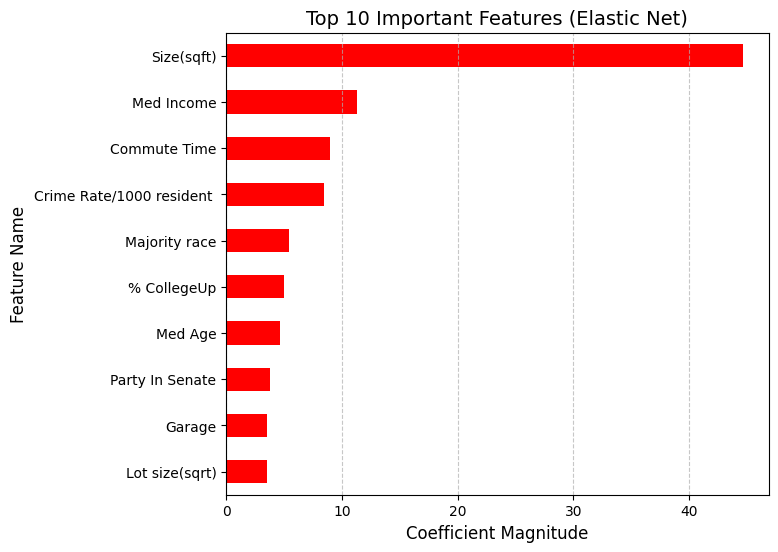

In [48]:
import pandas as pd

# Get feature importance (coefficients) for Elastic Net
feature_importance = pd.Series(elastic_final.coef_, index=X_train.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)  # Sort by absolute value

# Select top 10 features
top_features = feature_importance[:10]

# Bar chart with feature names on the Y-axis
plt.figure(figsize=(7,6))
top_features.sort_values().plot(kind="barh", color="red")
plt.xlabel("Coefficient Magnitude", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.title("Top 10 Important Features (Elastic Net)", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()